In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV,KFold,train_test_split
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,forest,gradient_boosting,RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.feature_selection import f_classif,SelectKBest
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [12]:
df=pd.read_csv('D:\Datatrained\Machine Leaning\Random Forest\cardio_train_unstructure.csv',sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [13]:
# Dataset Stats
print(df.shape)

(69301, 13)


In [14]:
# All are int and floor types.Understand the stats of Dataframe
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Observations
# 1 - No missing values
# 2 -Assuming Age is in number of days
# 3 -Outlier in Height
# 4 -Outlier in systolic blood pressure -ap_high
# 5- Oulier in ap_low
# 6 - Seems Cholestrol and glucose are binary, Will see in the further analysis

In [15]:
#  Drop Id and remove duplicates
df.drop('id',axis=1,inplace=True)
 
# Duplicate Removal

df.drop_duplicates(inplace=True)

In [16]:
df.shape

(69277, 12)

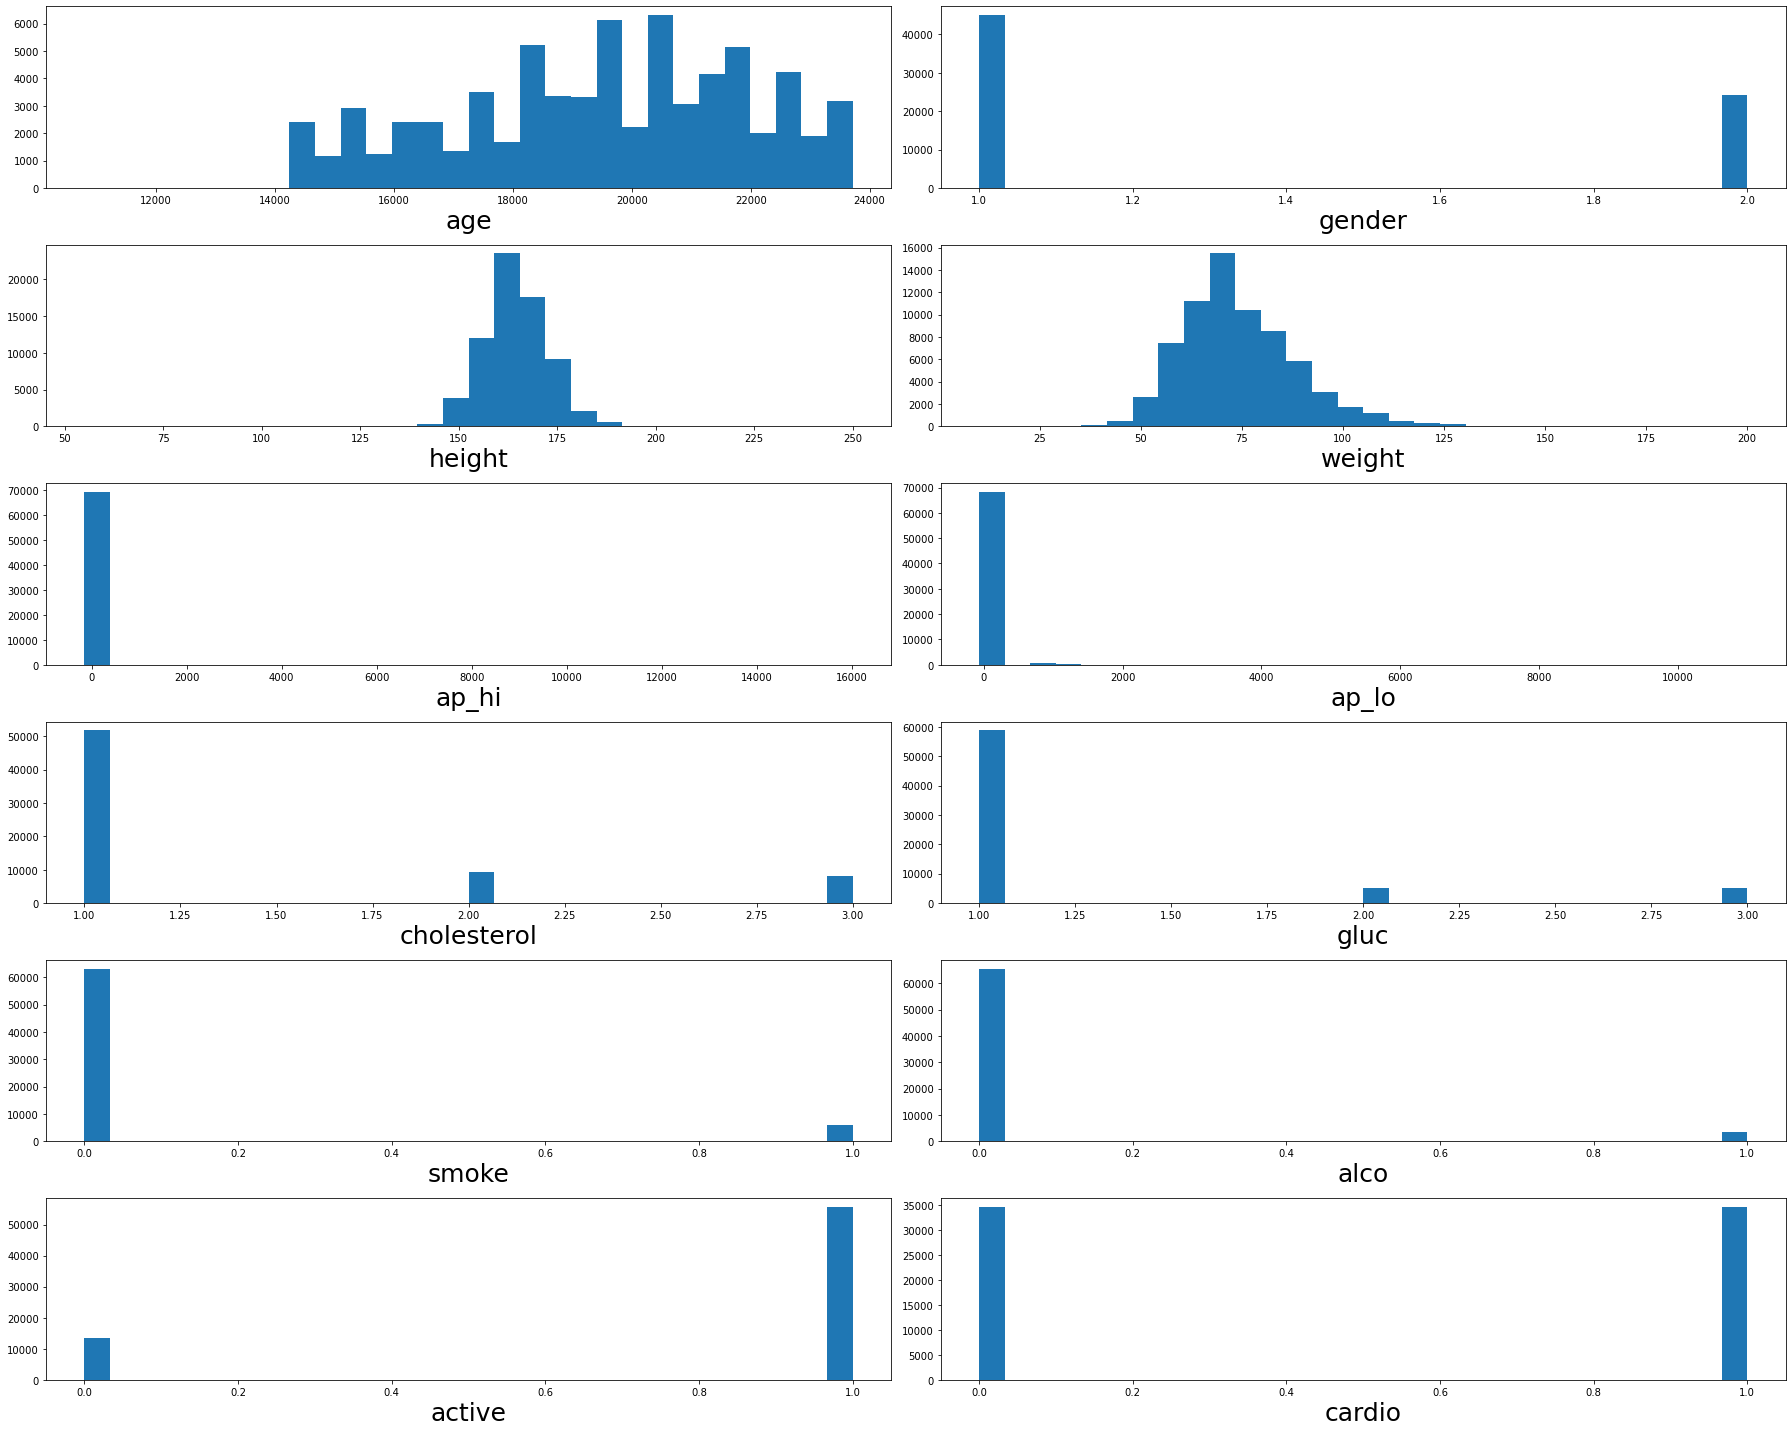

In [17]:
plt.figure(figsize=(25,20))
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        plt.hist(df[column],bins=30)
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

In [20]:
# Outlier treatment
# try boxplot
#try Quantile


# Z score method
# it is used for continueous data only
 # with std 3 lets see the stats
# from scipy import stats

from scipy.stats import zscore

z_score= zscore(df[['age','height','ap_hi','weight','ap_lo']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df[filtering_entry]

df.describe()



,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000
mean,19466.779053,1.347268,164.374555,73.566278,126.164430,81.286001,1.362010,1.223575,0.087159,0.053281,0.803949,0.492815
std,2467.040240,0.476105,7.690310,13.195627,17.860035,10.236086,0.677075,0.569505,0.282069,0.224595,0.397011,0.499952
min,14275.000000,1.000000,140.000000,32.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17660.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,188.000000,117.000000,401.000000,602.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


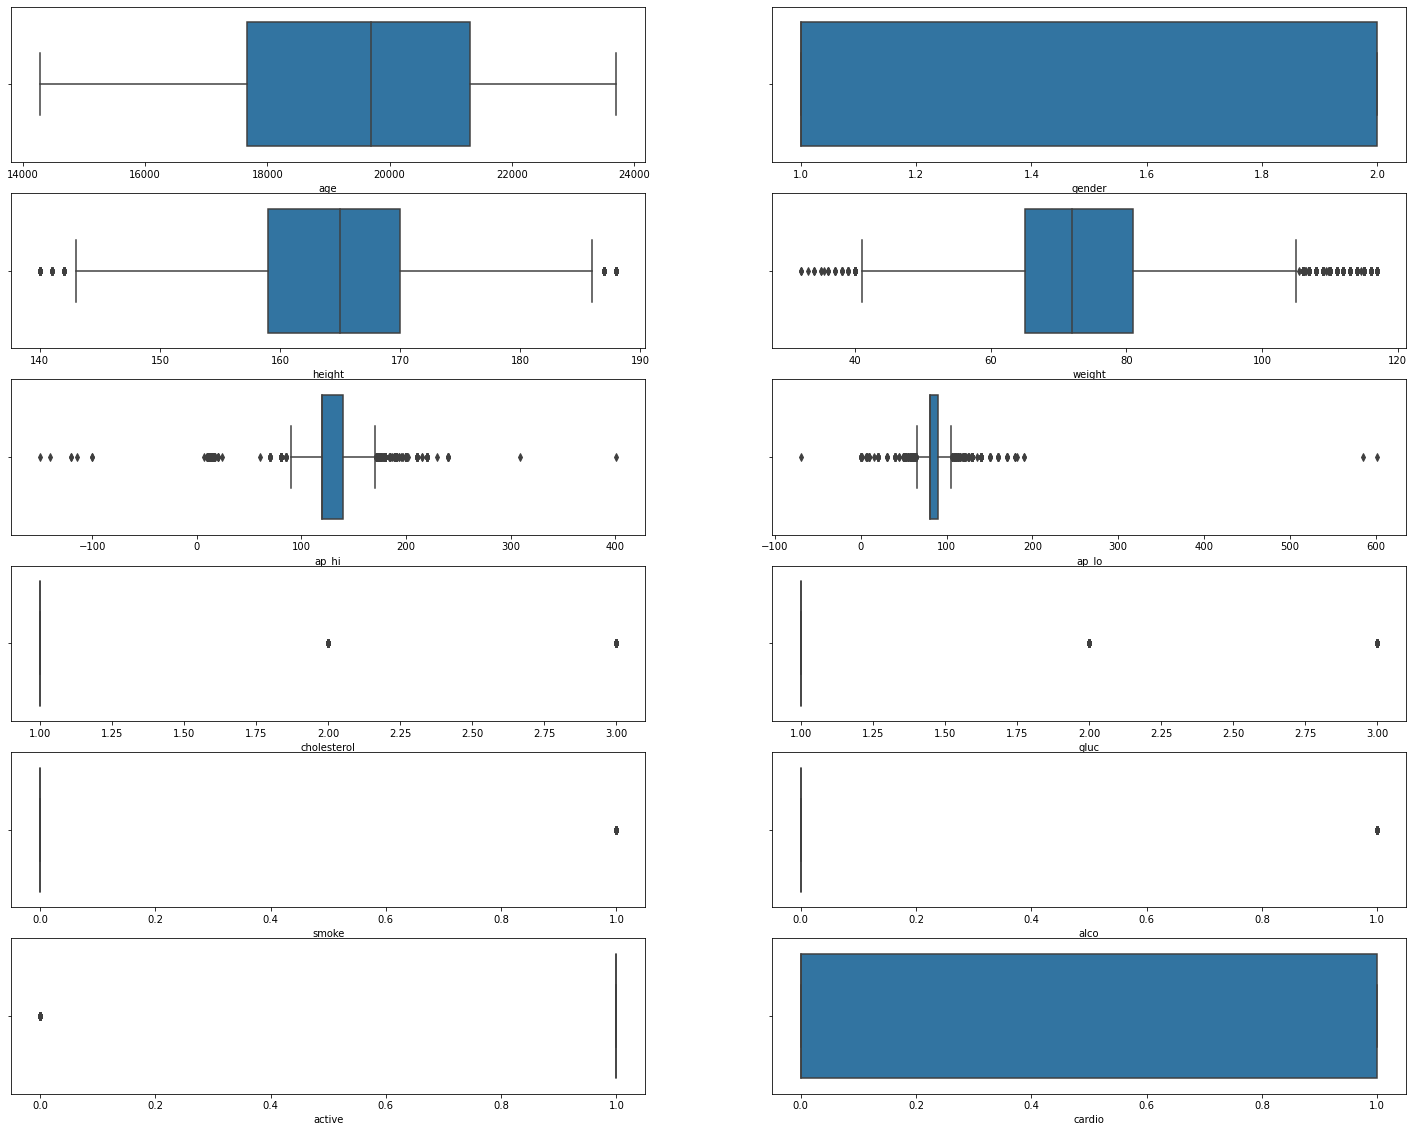

In [23]:
plt.figure(figsize=(25,20))
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.boxplot(df[column],orient='V')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [ ]:
# Outlier on higher side
#Height
#weight
#ap_high
#ap_low

In [24]:

# 1st quantile

q1=df.quantile(0.25)

#3rd quantile

q3=df.quantile(0.75)

# IQR

iqr=q3-q1

In [25]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [26]:
index=np.where(df['height']>(q3.height+(1.5*iqr.height)))
df=df.drop(df.index[index])
df.reset_index()

,index,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,4,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67241,69295,21074,1,165,80.0,150,80,1,1,0,0,1,1
67242,69296,19240,2,168,76.0,120,80,1,1,1,0,1,0
67243,69298,19066,2,183,105.0,180,90,3,1,0,1,0,1
67244,69299,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [27]:
index=np.where(df['weight']>(q3.weight+(1.5*iqr.weight)))
df=df.drop(df.index[index])
df.reset_index()

,index,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,4,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65981,69295,21074,1,165,80.0,150,80,1,1,0,0,1,1
65982,69296,19240,2,168,76.0,120,80,1,1,1,0,1,0
65983,69298,19066,2,183,105.0,180,90,3,1,0,1,0,1
65984,69299,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [28]:
index=np.where(df['ap_hi']>(q3.ap_hi+(1.5*iqr.ap_hi)))
df=df.drop(df.index[index])
df.reset_index()

,index,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,4,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65160,69294,19699,1,172,70.0,130,90,1,1,0,0,1,1
65161,69295,21074,1,165,80.0,150,80,1,1,0,0,1,1
65162,69296,19240,2,168,76.0,120,80,1,1,1,0,1,0
65163,69299,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [29]:
index=np.where(df['ap_lo']>(q3.ap_lo+(1.5*iqr.ap_lo)))
df=df.drop(df.index[index])
df.reset_index()

,index,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,4,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64741,69294,19699,1,172,70.0,130,90,1,1,0,0,1,1
64742,69295,21074,1,165,80.0,150,80,1,1,0,0,1,1
64743,69296,19240,2,168,76.0,120,80,1,1,1,0,1,0
64744,69299,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [30]:
# Outlier on lower side

index=np.where(df['height']<(q1.height-(1.5*iqr.height)))
df=df.drop(df.index[index])
df.reset_index()

,index,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,4,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64647,69294,19699,1,172,70.0,130,90,1,1,0,0,1,1
64648,69295,21074,1,165,80.0,150,80,1,1,0,0,1,1
64649,69296,19240,2,168,76.0,120,80,1,1,1,0,1,0
64650,69299,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [31]:
index=np.where(df['weight']<(q3.weight-(1.5*iqr.weight)))
df=df.drop(df.index[index])
df.reset_index()

,index,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,4,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59808,69294,19699,1,172,70.0,130,90,1,1,0,0,1,1
59809,69295,21074,1,165,80.0,150,80,1,1,0,0,1,1
59810,69296,19240,2,168,76.0,120,80,1,1,1,0,1,0
59811,69299,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [32]:
index=np.where(df['ap_hi']<(q3.ap_hi-(1.5*iqr.ap_hi)))
df=df.drop(df.index[index])
df.reset_index()

,index,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,4,23393,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56822,69294,19699,1,172,70.0,130,90,1,1,0,0,1,1
56823,69295,21074,1,165,80.0,150,80,1,1,0,0,1,1
56824,69296,19240,2,168,76.0,120,80,1,1,1,0,1,0
56825,69299,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [33]:
index=np.where(df['ap_lo']<(q3.ap_lo-(1.5*iqr.ap_lo)))
df=df.drop(df.index[index])
df.reset_index()

,index,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,2,21901,1,165,70.0,120,80,1,1,0,0,1,0
2,3,14549,2,165,85.0,120,80,1,1,1,1,1,0
3,4,23393,1,155,62.0,120,80,1,1,0,0,1,0
4,7,22547,1,161,93.0,140,90,2,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48065,69294,19699,1,172,70.0,130,90,1,1,0,0,1,1
48066,69295,21074,1,165,80.0,150,80,1,1,0,0,1,1
48067,69296,19240,2,168,76.0,120,80,1,1,1,0,1,0
48068,69299,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [34]:
df.shape

(48070, 12)

In [35]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,48070.000000,48070.000000,48070.000000,48070.000000,48070.000000,48070.000000,48070.000000,48070.000000,48070.000000,48070.000000,48070.000000,48070.000000
mean,19652.280653,1.368650,164.952112,75.136983,129.449095,84.093863,1.383607,1.233347,0.087976,0.053942,0.802330,0.543125
std,2400.324327,0.482444,7.393879,11.182319,13.260835,6.187435,0.697715,0.582168,0.283263,0.225906,0.398246,0.498142
min,14287.000000,1.000000,143.000000,57.000000,110.000000,75.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,18141.000000,1.000000,160.000000,66.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19811.000000,1.000000,165.000000,73.350000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,21651.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,186.000000,105.000000,170.000000,105.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


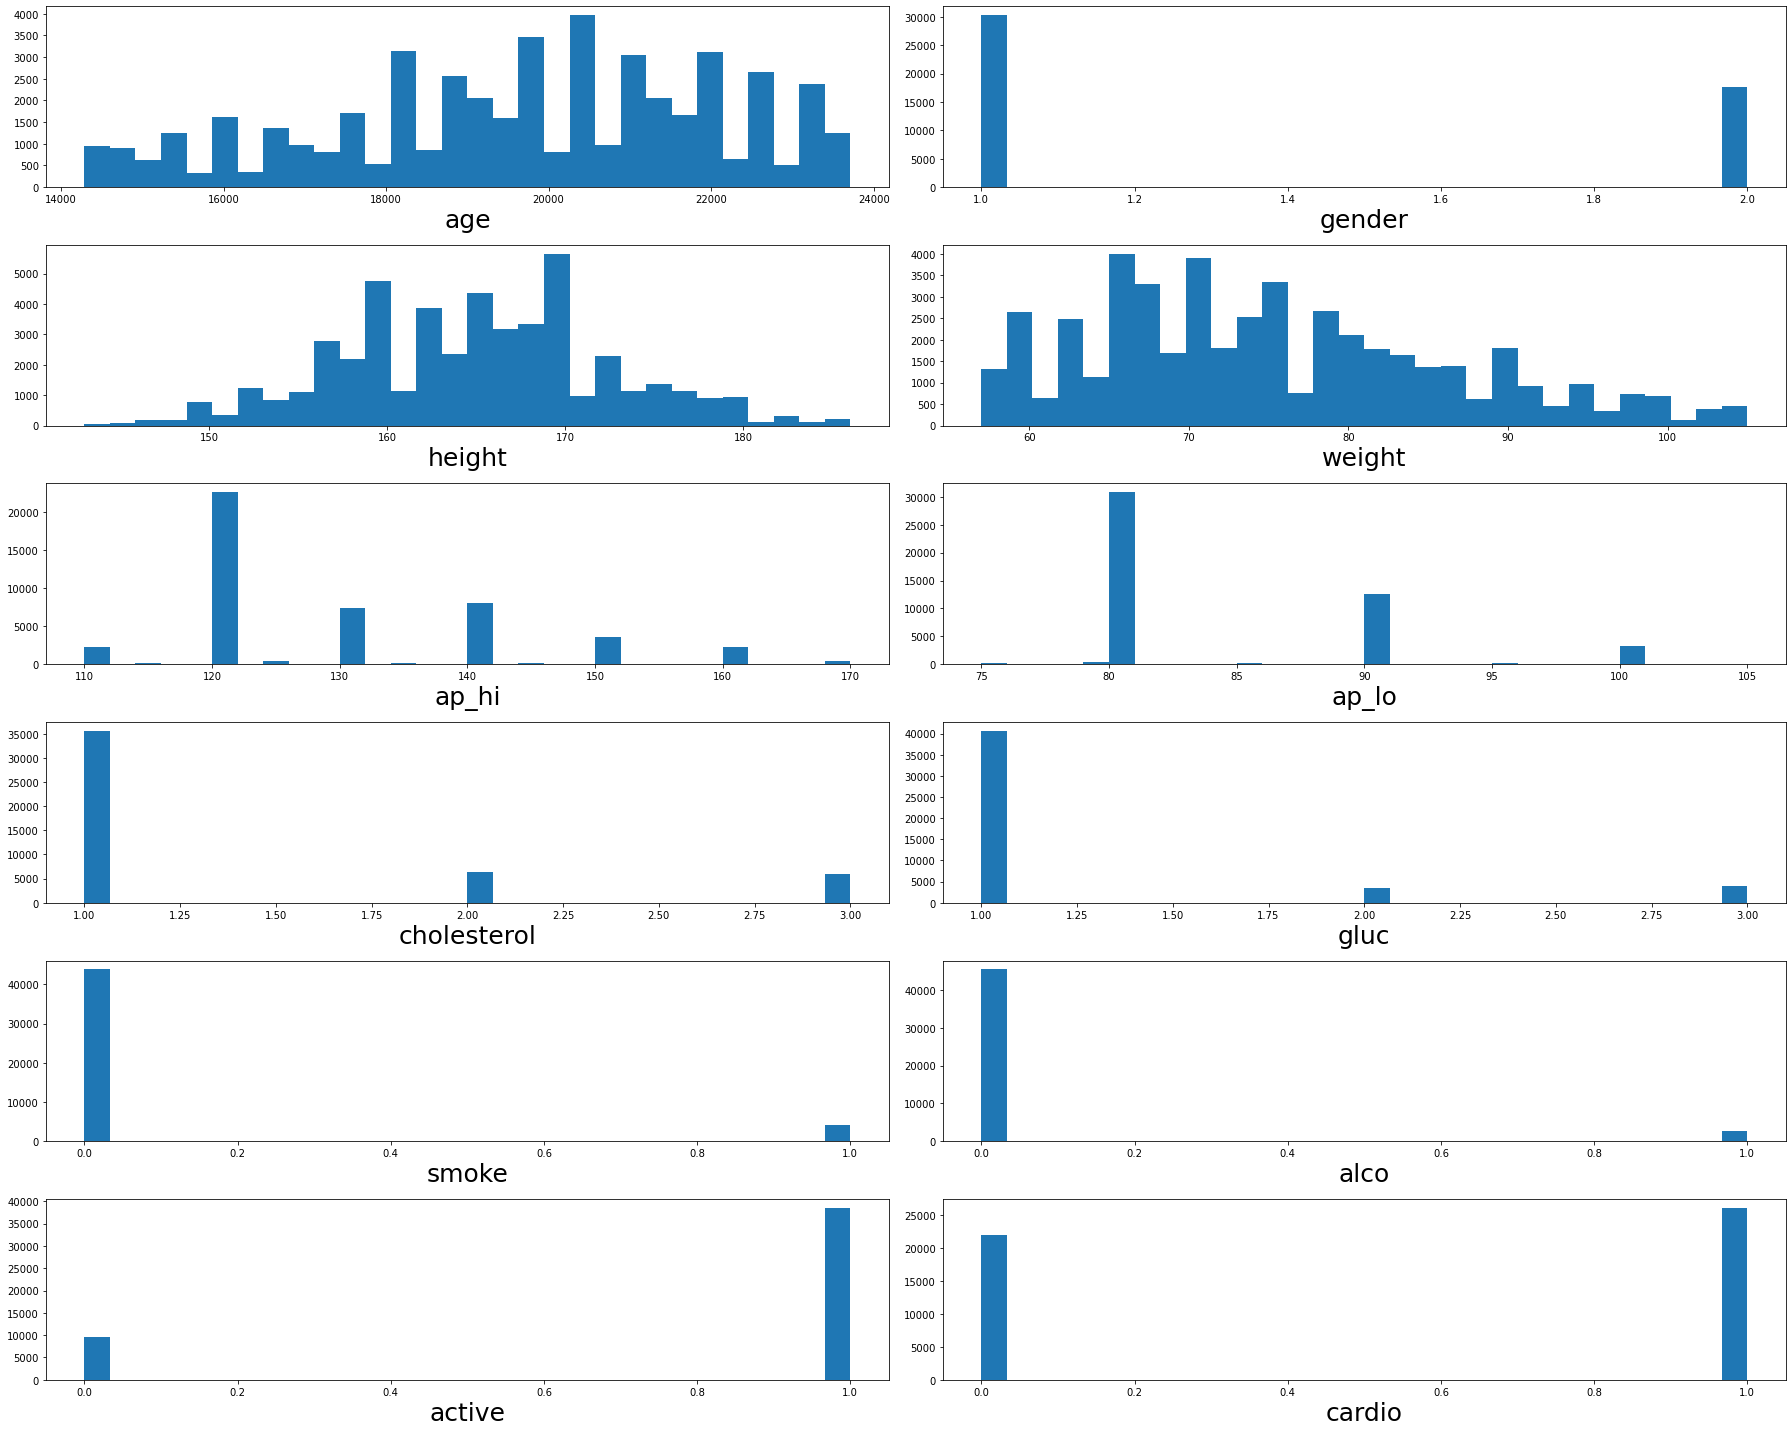

In [37]:
plt.figure(figsize=(25,20))
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        plt.hist(df[column],bins=30)
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

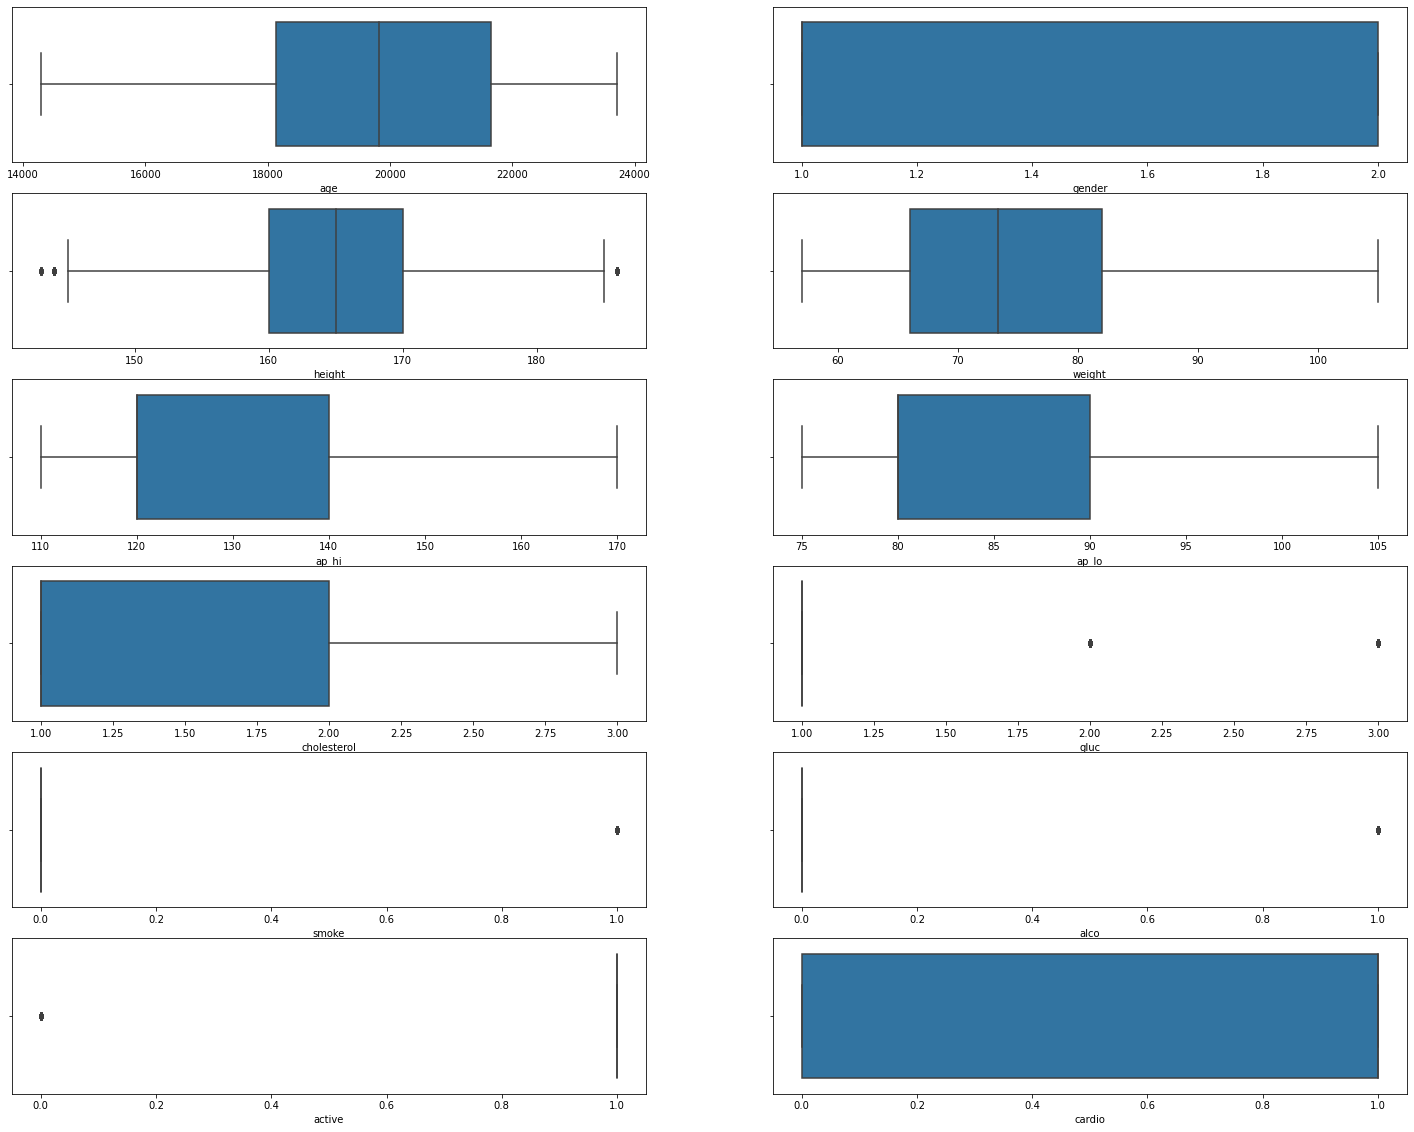

In [38]:
plt.figure(figsize=(25,20))
plotnumber=1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.boxplot(df[column],orient='V')
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [39]:
#lets build model
X=df.drop(columns=['cardio'],axis=1)
y=df['cardio']

In [41]:
# Multicolilinearity -vif
scaler=StandardScaler()
X_scalar=scaler.fit_transform(X)
vif=pd.DataFrame()
vif['score']=[variance_inflation_factor(X_scalar,i) for i in range(X_scalar.shape[1])]
vif['feature']=X.columns
vif

,score,feature
0,1.054324,age
1,1.494227,gender
2,1.470523,height
3,1.129322,weight
4,1.953847,ap_hi
5,1.887315,ap_lo
6,1.323593,cholesterol
7,1.260838,gluc
8,1.251706,smoke
9,1.145887,alco


In [51]:
# RandomForestClassier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=41)

In [52]:
clf=RandomForestClassifier()

In [60]:
params ={'n_estimators':[13,15],
       'criterion':['entropy'],
       'max_depth':[10],
       'min_samples_split':[10,11],
       'min_samples_leaf':[5,6]}

grd = GridSearchCV(clf,param_grid=params)
grd.fit(X_train,y_train)
print('best_params =>', grd.best_params_)

clf=grd.best_estimator_ # reinstantiating with best params
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

fr_conf_mat= confusion_matrix(y_test,y_pred)
print('conf_mat =>','\n',fr_conf_mat)

print('Accuracy rf Normal =====>',accuracy_score(y_test,y_pred))

best_params => {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 15}
conf_mat => 
 [[5186 2017]
 [2357 6304]]
Accuracy rf Normal =====> 0.7242813918305597


In [61]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      7203
           1       0.76      0.73      0.74      8661

    accuracy                           0.72     15864
   macro avg       0.72      0.72      0.72     15864
weighted avg       0.73      0.72      0.72     15864



In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import plot_roc_curve

In [64]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
kn=KNeighborsClassifier()

In [67]:
# Training with all classifier
# Hypertunig required before below step

lr.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
kn.fit(X_train,y_train)

print('All models are trained')

All models are trained


In [68]:
# All models scored captured

lr.score(X_train,y_train)
dt.score(X_train,y_train)
rf.score(X_train,y_train)
kn.score(X_train,y_train)

print('All models test score captured ')


All models test score captured 


In [ ]:
#Lest find AUC and ROC score

In [74]:
# Logistic Classifier
roc_auc_score(y_test,lr.predict(X_test))

0.692346418219211

In [75]:
# Decisiontree Classifier
roc_auc_score(y_test,dt.predict(X_test))

0.6201763966934264

In [76]:
# Randomforest Classifier
roc_auc_score(y_test,rf.predict(X_test))

0.6983651791163297

In [77]:
# KNN Classifier
roc_auc_score(y_test,kn.predict(X_test))

0.6676112900077571

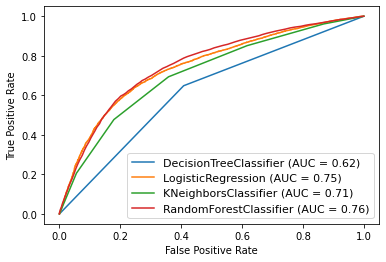

In [79]:
disp=plot_roc_curve(dt,X_test,y_test)
plot_roc_curve(lr,X_test,y_test,ax=disp.ax_) # ax_=Axes with the Confusion matrix
plot_roc_curve(kn,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()
